# CertiK – Web Scraping Technical Evaluation

## Exercise 2: Sentiment Analysis of Tweets

- In the interest of time, I avoided the Twitter API route. I felt that the CertiK twitter account didn't have as much content as I was hoping for.
- The tweets provided in the GitHub link were okay, however I wanted a dataset more focused on Web3 or Crypto, so I went to Kaggle.com and found a BTC/Tweets dataset.


In [72]:
import pandas as pd

# Import our BTC/Twitter data, I am choosing to limit it to 5000 rows (the whole dataset has ~50,000 rows)
df = pd.read_csv('BTC_tweets_daily_example.csv',index_col=[0],nrows=5000)

Originally, I planned to roughly follow these steps:

Preprocessing:
- Load the raw text.
- Split into tokens.
- Convert to lowercase.
- Remove punctuation from each token.
- Filter out remaining tokens that are not alphabetic.
- Filter out tokens that are stop words.

Sentiment Analysis:
- Transform features with vectorizer
- Import train_test_split from sklearn and split the data
- Use a Naive Bayes classifier to conduct sentiment analysis 


But...

I discovered VADER! Once again in the interest of time, I felt this was the better option for me. VADER is specifically designed for sentiments expressed in social media. It does not require training data, it understands western society focused sentiment of text containing emoticons, slangs, conjunctions, etc, and it's open-source.

In [77]:
# import VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores("Certik seems like a wonderful place to work, I have high hopes!")
print(vs)

{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.8516}


In [75]:
# Our dataset comes with sentiment analysis already carried out, though the method is unknown.
# Let's compare our own sentiment analysis to what has already been analyzed.
df['Sentiment'].value_counts()

['positive']    2281
['neutral']     2152
['negative']     567
Name: Sentiment, dtype: int64

In [78]:
# Create a VADER function to analyze the sentiment of each tweet, we will use the compound score, evaluated in the following way:
def sentiment_Vader(text):
    over_all_polarity = analyzer.polarity_scores(text)
    if over_all_polarity['compound'] >= 0.05:
        return "positive"
    elif over_all_polarity['compound'] <= -0.05:
        return "negative"
    else:
        return "neutral" 

# Let's use a simplified dataframe that only uses what we need
df2 = df[['Tweet','Sentiment']].copy()
df2['vader_sentiment'] = df2['Tweet'].apply(lambda x: sentiment_Vader(x))

# I like to be able to explore the entire dataframe, the following lines of code will help me do just that
pd.set_option('display.max_rows', None) #Fully display data
pd.set_option('display.max_colwidth', None) #Fully display data

df2

,Tweet,Sentiment,vader_sentiment
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",['neutral'],negative
1,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,['neutral'],positive
2,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,['positive'],neutral
3,free coins https://t.co/DiuoePJdap,['positive'],positive
4,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,['positive'],positive
5,"Copy successful traders automatically with Bitcoin! 💰💰\n\nI copy ""Dividend667"". Do you?\n\n➡️ https://t.co/qb2NXPknVt… https://t.co/Q43fKQRYzx",['positive'],positive
6,RT @bethereumteam: We're revealing our surprise tomorrow! \nAre you ready to celebrate with us? 😮\n#surprise #presents #crypto #bitcoin #ethe…,['positive'],positive
7,One click to start mining cryptocurrencies together with &gt;45K people. #bitcoin https://t.co/rjZC2dia2S #PaaS #cloudnetwork,['neutral'],neutral
8,"first speaker @digitsu\n\n""how we can get bitcoin to be the greatest CASH in the world\nmedium of exchange, not meant… https://t.co/kV3S9kT32A",['positive'],positive
9,@p0nd3ea Bitcoin wasn't built to live on exchanges.,['positive'],neutral


In [71]:
# Now, we can compare the 2 methodologies
print(df2['Sentiment'].value_counts())

print(df2['vader_sentiment'].value_counts())

['positive']    2281
['neutral']     2152
['negative']     567
Name: Sentiment, dtype: int64
positive    2390
neutral     1798
negative     812
Name: vader_sentiment, dtype: int64


Seems somewhat comparable, close enough! 


### Calculate popular key words

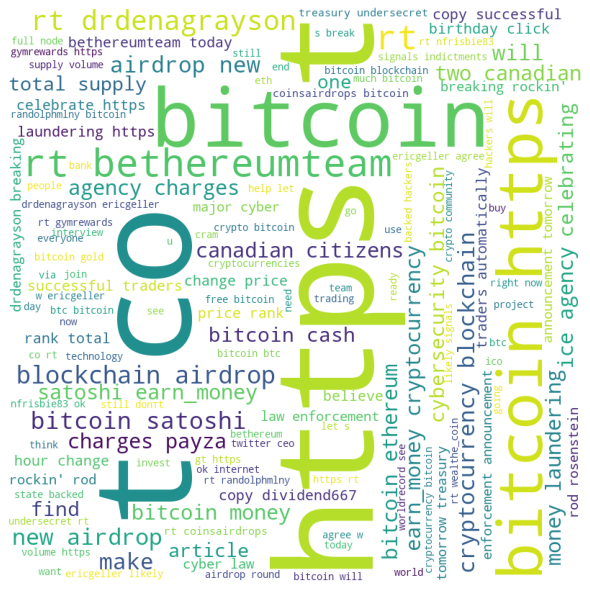

In [67]:
# We can use WordCloud to help us visualize popular key words

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df2.Tweet:

# typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()